This script will generate a heatmap of hypoteses A, B and E.

This is due to the following contrasts:
* hypo a is laminar over static
* hypo b is oscillatory over laminar
* hypo c i osicllatory Pi over laminar Pi
* hypo d is laminar Pi over laminar no Pi
* hypo E is oscillatory Pi over oscillatory no Pi

In [1]:
import os, pandas, numpy, seaborn
import scipy, scipy.stats

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(16, 9)})

In [3]:
colors = [(0, "blue"), (0.5-0.125, "white"), (0.5+0.125, "white"), (1, "red")]
bwwr = matplotlib.colors.LinearSegmentedColormap.from_list("bwwr", colors)

# 0. user-defined variables

In [4]:
DEG_called_folder = '/home/adrian/projects/hegoi/results/subsamples/DEG_filtered/'
expression_file = '/home/adrian/projects/hegoi/results/tpm/DESeq2_TPM_values.tsv'
metadata_file = '/home/adrian/projects/hegoi/metadata/hegoi metadata - hypotheses formatted for filter.tsv'

In [5]:
working_hypotheses = ['A', 'B', 'E']

# 1. read data

## 1.1. read DEG names

In [6]:
file_names = os.listdir(DEG_called_folder)
file_names.sort()

working_file_names = []
for file_name in file_names:
    for working_hypothesis in working_hypotheses:
        if working_hypothesis in file_name:
            working_file_names.append(file_name)

# get all DEGs
gene_list = []
for file_name in working_file_names:
    path = DEG_called_folder + file_name
    #print(path)
    df = pandas.read_csv(path)
    print(file_name, df.shape)
    genes = df['ENSEMBL'].to_list()
    for gene in genes:
        gene_list.append(gene)
DEGs = list(set(gene_list))
print('Detected {} DEGs'.format(len(DEGs)))
    

annotateddf_hypothesis_A_down.tsv (302, 9)
annotateddf_hypothesis_A_up.tsv (172, 9)
annotateddf_hypothesis_B_down.tsv (302, 9)
annotateddf_hypothesis_B_up.tsv (194, 9)
annotateddf_hypothesis_E_down.tsv (9, 9)
annotateddf_hypothesis_E_up.tsv (2, 9)
Detected 793 DEGs


## 1.2. read expression

In [7]:
expression = pandas.read_csv(expression_file, sep='\t', index_col=0)
print(expression.shape)
expression.head()

(40320, 26)


Lam153    Lami154      Lami46      Lami94    LamiP109  \
ENSG00000000003  24.240953  20.242011   22.919919   15.438227   18.098457   
ENSG00000000005   0.062960   0.000000    0.000000    0.000000    0.000000   
ENSG00000000419  59.982918  62.984443  120.871295  138.059565  115.707396   
ENSG00000000457   4.680221   3.684855    1.989328    3.244174    4.417648   
ENSG00000000460   1.982690   1.344508    1.422365    1.667403    0.570064   

                  LamiP153    LamiP154    LamiP176    LamiPi46    LamiPi94  \
ENSG00000000003  29.000777   14.784503   11.903633   26.217884   18.455471   
ENSG00000000005   0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000000419  84.892000  172.643218  147.901176  145.183145  135.750959   
ENSG00000000457   2.189278    6.217483    3.998143    4.786793    2.949599   
ENSG00000000460   2.856698    0.416009    0.000000    1.310974    1.812507   

                 ...   OsciP154    OsciP175   OsciP178    OsciPi46    Stat109  \
ENSG00000000003  ...  38.756393   15.976121  21.649331   28.426877  29.688663   
ENSG00000000005  ...   0.000000    0.000000   0.000000    0.000000   0.000000   
ENSG00000000419  ...  98.473591  161.024012  86.023654  115.321222  64.464680   
ENSG00000000457  ...   3.012943    1.024624   2.255165    2.967113   1.825466   
ENSG00000000460  ...   5.510741    3.805323   1.489214    0.957885   4.467578   

                   Stat153    Stat154    Stat176     Stat46     Stat94  
ENSG00000000003  29.207002  28.989493  28.832380  34.600089  27.971771  
ENSG00000000005   0.000000   0.000000   0.013958   0.000000   0.139231  
ENSG00000000419  81.686544  84.388415  88.740844  81.992995  97.987628  
ENSG00000000457   2.371161   3.513856   2.617785   2.546863   2.668982  
ENSG00000000460   5.425887   7.680067   4.002537   3.650609   4.056977  

[5 rows x 26 columns]

In [8]:
log2tpmPO = numpy.log2(expression + 1)
log2tpmPO.head()

Lam153   Lami154    Lami46    Lami94  LamiP109  LamiP153  \
ENSG00000000003  4.657694  4.408848  4.580141  4.038983  4.255384  4.906928   
ENSG00000000005  0.088088  0.000000  0.000000  0.000000  0.000000  0.000000   
ENSG00000000419  5.930333  5.999649  6.929215  7.119559  6.866752  6.424452   
ENSG00000000457  2.505947  2.228005  1.579821  2.085484  2.437667  1.673230   
ENSG00000000460  1.576614  1.229285  1.276416  1.415436  0.650823  1.947366   

                 LamiP154  LamiP176  LamiPi46  LamiPi94  ...  OsciP154  \
ENSG00000000003  3.980437  3.689705  4.766483  4.282104  ...  5.313115   
ENSG00000000005  0.000000  0.000000  0.000000  0.000000  ...  0.000000   
ENSG00000000419  7.439982  7.218211  7.191633  7.095407  ...  6.636242   
ENSG00000000457  2.851496  2.321392  2.532764  1.981706  ...  2.004661   
ENSG00000000460  0.501830  0.000000  1.208501  1.491857  ...  2.702822   

                 OsciP175  OsciP178  OsciPi46   Stat109   Stat153   Stat154  \
ENSG00000000003  4.085435  4.501397  4.879063  4.939634  4.916811  4.906385   
ENSG00000000005  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ENSG00000000419  7.340064  6.443336  6.861971  6.032645  6.369581  6.415968   
ENSG00000000457  1.017654  1.702731  1.988089  1.498489  1.753246  2.174361   
ENSG00000000460  2.264633  1.315690  0.969296  2.450902  2.683896  3.117706   

                  Stat176    Stat46    Stat94  
ENSG00000000003  4.898807  5.153809  4.856576  
ENSG00000000005  0.019998  0.000000  0.188060  
ENSG00000000419  6.487693  6.374918  6.629176  
ENSG00000000457  1.855107  1.826544  1.875380  
ENSG00000000460  2.322660  2.217420  2.338275  

[5 rows x 26 columns]

## 1.3. read metadata

In [9]:
metadata = pandas.read_csv(metadata_file, sep='\t')
metadata.head()

hypothesis  patient  sampleA  sampleB
0  hypothesis_A       46   Stat46   Lami46
1  hypothesis_A      153  Stat153   Lam153
2  hypothesis_A      154  Stat154  Lami154
3  hypothesis_A       94   Stat94   Lami94
4  hypothesis_B       46   Lami46   Osci46

In [10]:
samples = []
for working_hypothesis in working_hypotheses:
    label = 'hypothesis_{}'.format(working_hypothesis)
    
    sub = metadata[metadata['hypothesis'] == label]
    
    samplesA = sub['sampleA'].to_list()
    samplesB = sub['sampleB'].to_list()
    both = samplesA + samplesB
    
    for element in both:
        samples.append(element)
    
working_samples = list(set(samples))

# 2. build the heatmap

In [11]:
print(log2tpmPO.shape)
block = expression.loc[DEGs, working_samples]
print(block.shape)
block.head()

(40320, 26)
(793, 16)


Stat154    OsciP153     Osci153     Osci154     Osci109  \
ENSG00000091879  85.339826   77.550724  107.351856  104.449693   54.769615   
ENSG00000213648  14.935630   15.930940    6.632300    3.056494   15.206510   
ENSG00000178105  89.476730  475.907000   29.925300   31.393430  169.265200   
ENSG00000152377   9.227849    6.307783   25.589690    6.151178    4.774963   
ENSG00000198624   8.234123    3.792561    4.553075   11.517880    4.678688   

                  OsciP154     Stat46   OsciP109     Lam153    Stat153  \
ENSG00000091879  74.015182  47.639608  59.228210  14.263928  73.340591   
ENSG00000213648   2.293581  30.537400  14.496780  64.747350  37.056010   
ENSG00000178105  83.088220  41.567820  84.263280  50.028950  41.087510   
ENSG00000152377   4.719620  61.782120  13.874580   8.019330  21.860340   
ENSG00000198624   7.753626   3.812058   5.260369  49.262210   9.004949   

                    Osci46      Lami94      Lami46    OsciPi46    Lami154  \
ENSG00000091879  54.985820   13.132689   22.274799   31.890704   6.042058   
ENSG00000213648  15.891030   14.539270   26.168850    9.590543  59.526910   
ENSG00000178105  67.507920  238.623500  144.128000  183.000400  26.919380   
ENSG00000152377  48.038120    1.124972    9.387560   15.183440   3.791828   
ENSG00000198624   4.621507   11.869200    6.295504    3.672148  49.341960   

                    Stat94  
ENSG00000091879  62.883703  
ENSG00000213648  30.296580  
ENSG00000178105  19.276270  
ENSG00000152377   5.545145  
ENSG00000198624   2.332675

In [12]:
gene_means = numpy.mean(block, axis='columns')
gene_means

ENSG00000091879     55.572438
ENSG00000213648     22.556636
ENSG00000178105    110.966182
ENSG00000152377     15.336157
ENSG00000198624     11.625158
                      ...    
ENSG00000215788     69.781767
ENSG00000204403      3.471428
ENSG00000111341    152.116802
ENSG00000148671    112.483382
ENSG00000213316      2.531837
Length: 793, dtype: float64

In [13]:
zscore_df = scipy.stats.zscore(block, axis=1)
zscore_df.head()

Stat154  OsciP153   Osci153   Osci154   Osci109  OsciP154  \
ENSG00000091879  0.976894  0.721274  1.699276  1.604034 -0.026347  0.605246   
ENSG00000213648 -0.429567 -0.373465 -0.897594 -1.099149 -0.414299 -1.142152   
ENSG00000178105 -0.189947  3.225737 -0.716326 -0.703349  0.515309 -0.246415   
ENSG00000152377 -0.371570 -0.549198  0.623725 -0.558724 -0.642440 -0.645806   
ENSG00000198624 -0.233977 -0.540440 -0.487965 -0.007402 -0.479298 -0.267131   

                   Stat46  OsciP109    Lam153   Stat153    Osci46    Lami94  \
ENSG00000091879 -0.260336  0.119974 -1.355646  0.583108 -0.019251 -1.392770   
ENSG00000213648  0.449845 -0.454304  2.378130  0.817275 -0.375715 -0.451909   
ENSG00000178105 -0.613417 -0.236029 -0.538628 -0.617662 -0.384131  1.128372   
ENSG00000152377  2.825318 -0.088908 -0.445084  0.396867  1.989267 -0.864469   
ENSG00000198624 -0.539094 -0.439163  2.596910 -0.180791 -0.483243  0.016839   

                   Lami46  OsciPi46   Lami154    Stat94  
ENSG00000091879 -1.092748 -0.777178 -1.625468  0.239938  
ENSG00000213648  0.203607 -0.730849  2.083874  0.436271  
ENSG00000178105  0.293120  0.636715 -0.742896 -0.810454  
ENSG00000152377 -0.361854 -0.009290 -0.702244 -0.595589  
ENSG00000198624 -0.367740 -0.548748  2.602413 -0.641170

In [14]:
top = numpy.max(numpy.max(zscore_df, axis=1))
bottom = numpy.min(numpy.min(zscore_df, axis=1))

print(top, bottom)

3.774032830091167 -2.287596093480449


working with complete and euclidean...
working with complete and correlation...
working with complete and braycurtis...
working with complete and chebyshev...
working with complete and seuclidean...
working with complete and minkowski...
working with complete and sqeuclidean...
working with single and euclidean...
working with single and correlation...
working with single and braycurtis...
working with single and seuclidean...
working with single and sqeuclidean...
working with average and euclidean...
working with average and correlation...
working with average and braycurtis...
working with average and chebyshev...
working with average and seuclidean...
working with average and minkowski...
working with average and sqeuclidean...
working with ward and euclidean...
working with ward and correlation...


/home/adrian/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:805: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(figsize=figsize)


working with ward and braycurtis...
working with ward and chebyshev...
working with ward and seuclidean...
working with ward and minkowski...
working with ward and sqeuclidean...
working with weighted and euclidean...
working with weighted and correlation...
working with weighted and braycurtis...
working with weighted and chebyshev...
working with weighted and seuclidean...
working with weighted and minkowski...
working with weighted and sqeuclidean...
working with centroid and euclidean...
working with centroid and correlation...
working with centroid and braycurtis...
working with centroid and chebyshev...
working with centroid and seuclidean...
working with centroid and minkowski...
working with centroid and sqeuclidean...
working with median and euclidean...
working with median and correlation...
working with median and braycurtis...
working with median and chebyshev...
working with median and seuclidean...
working with median and minkowski...
working with median and sqeuclidean..

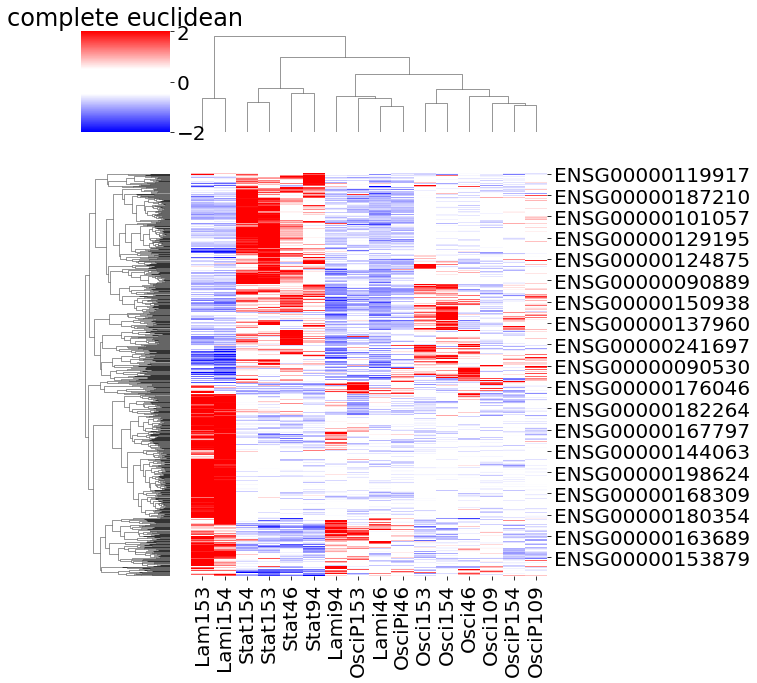

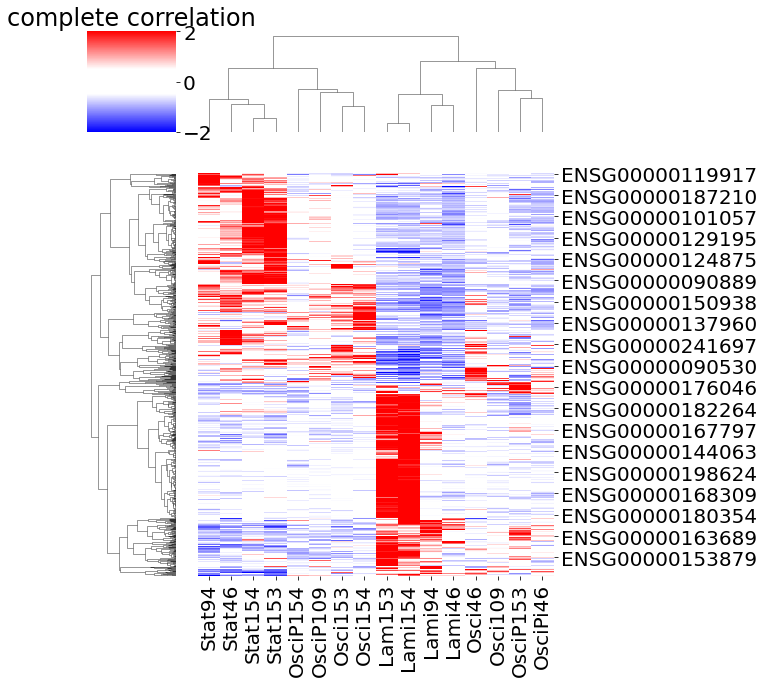

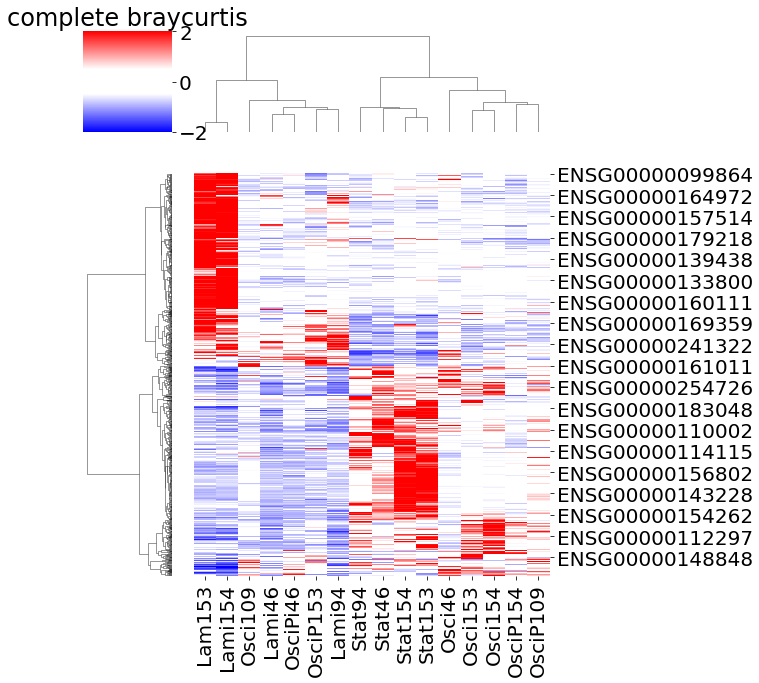

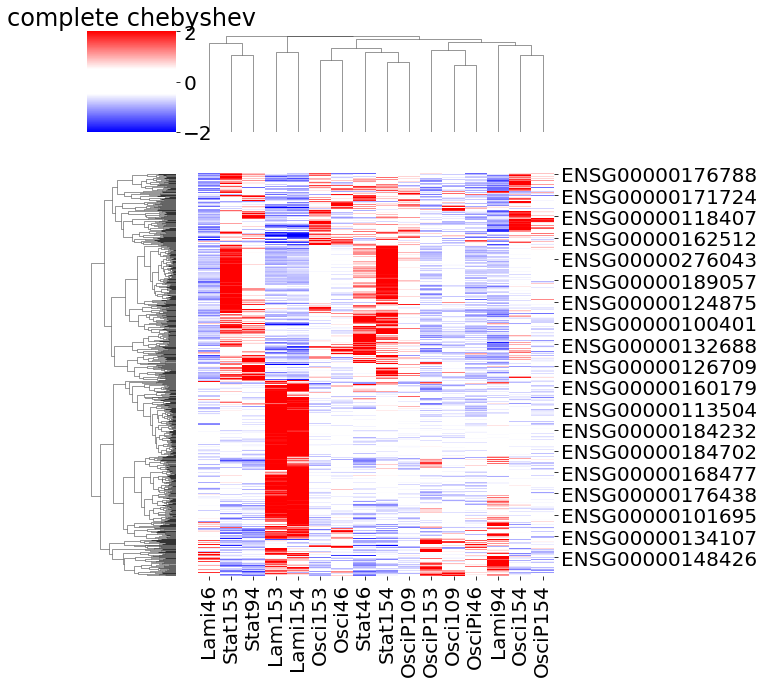

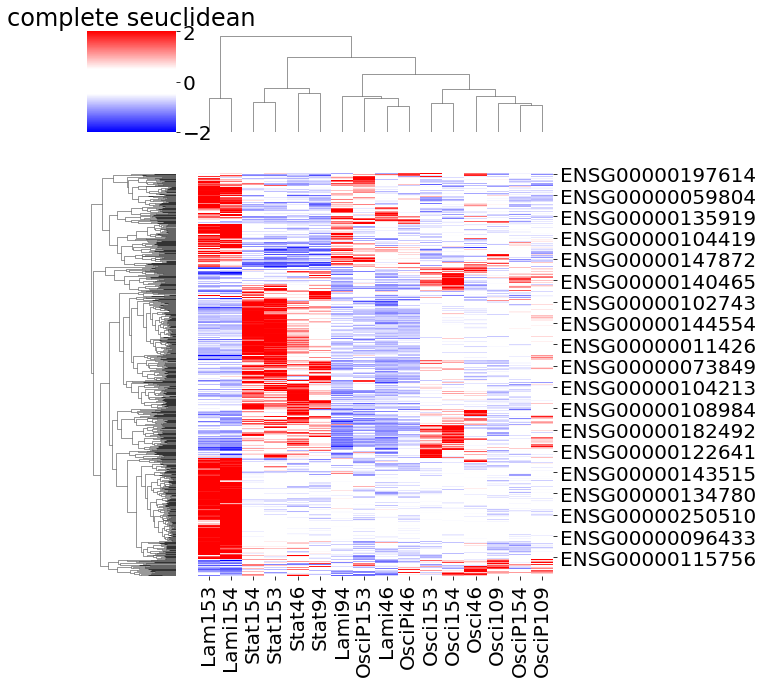

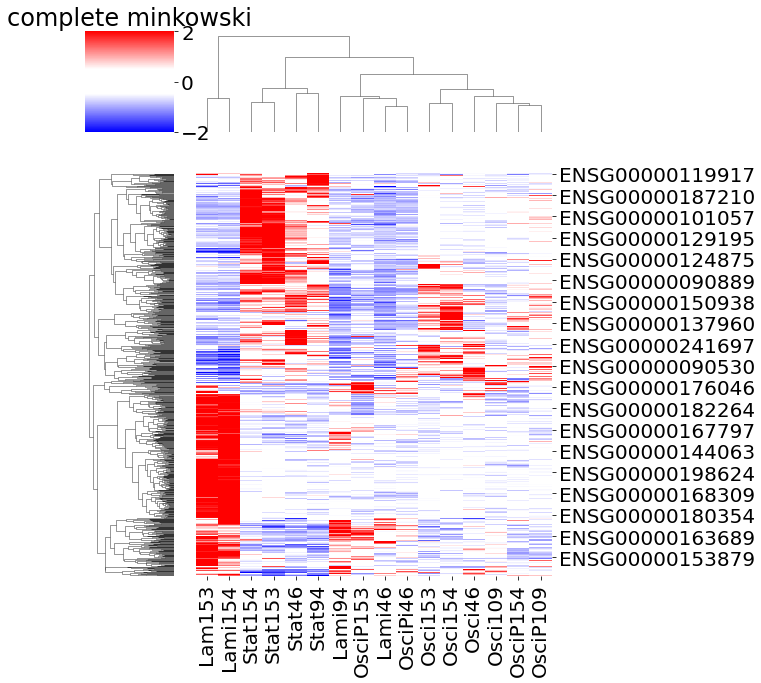

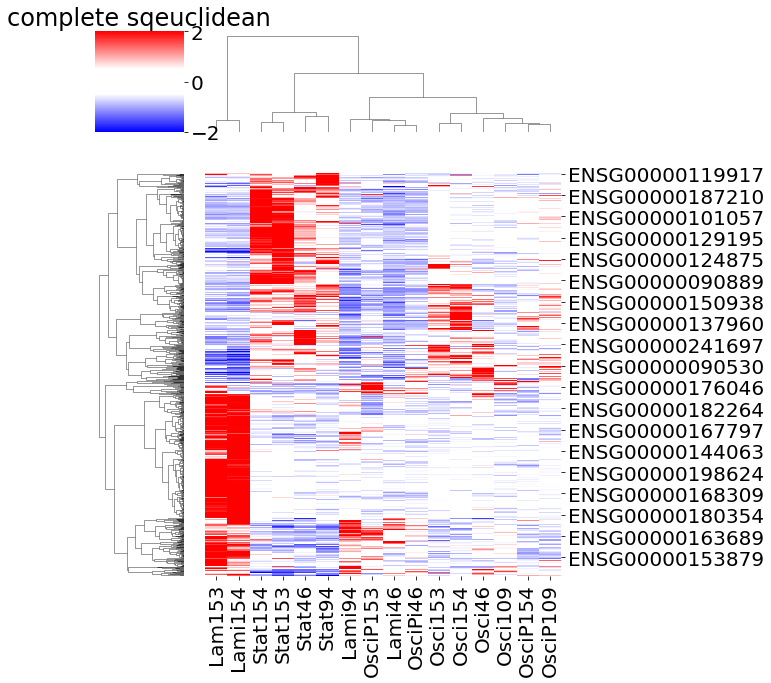

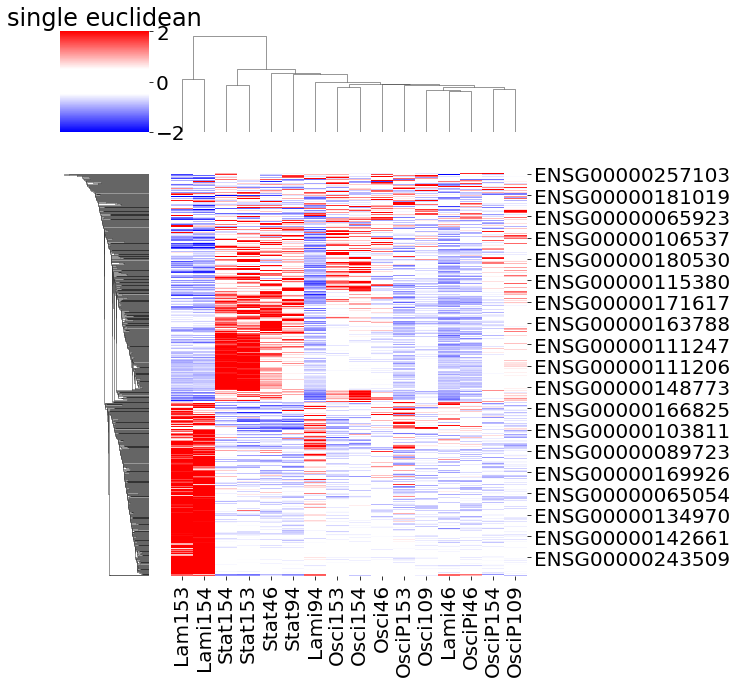

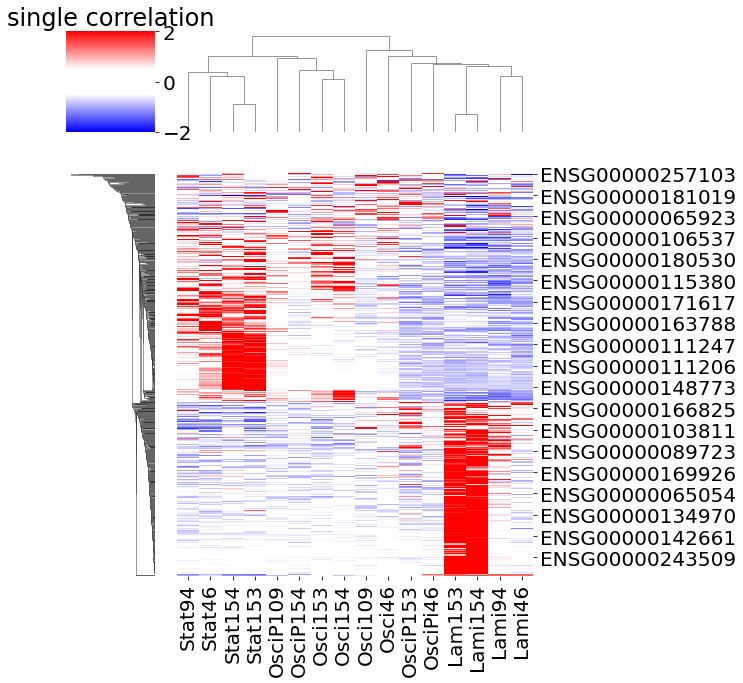

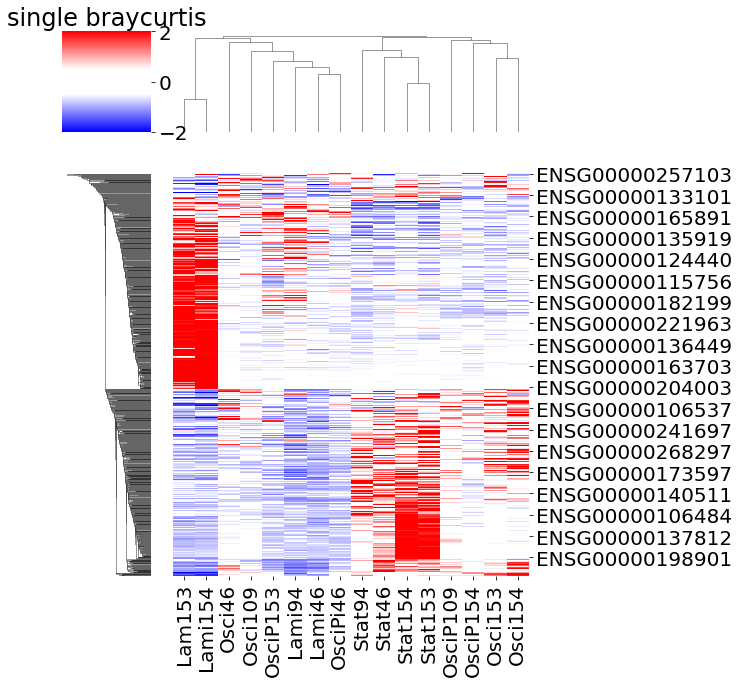

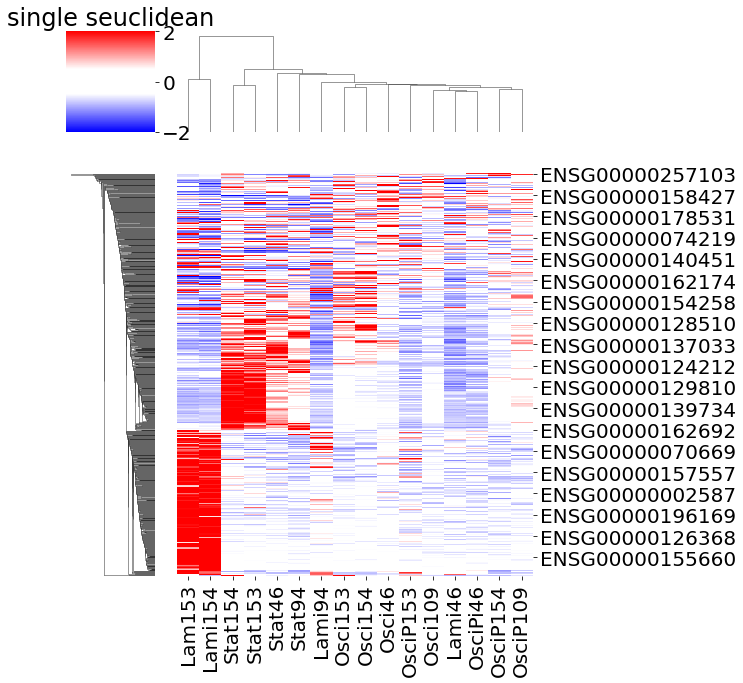

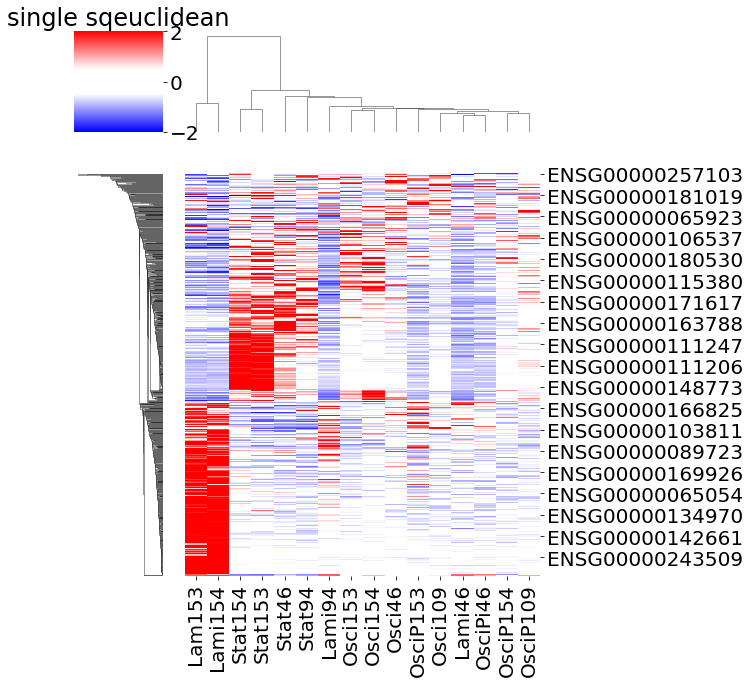

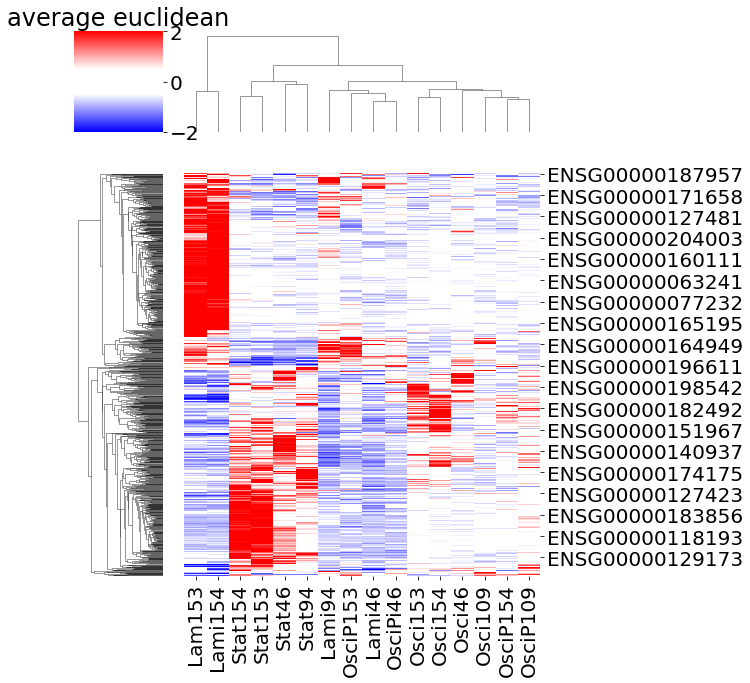

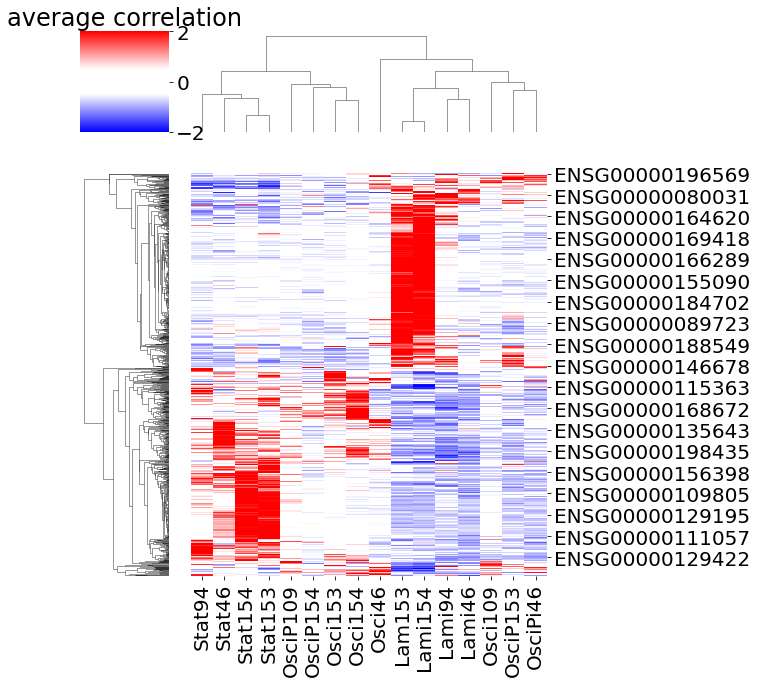

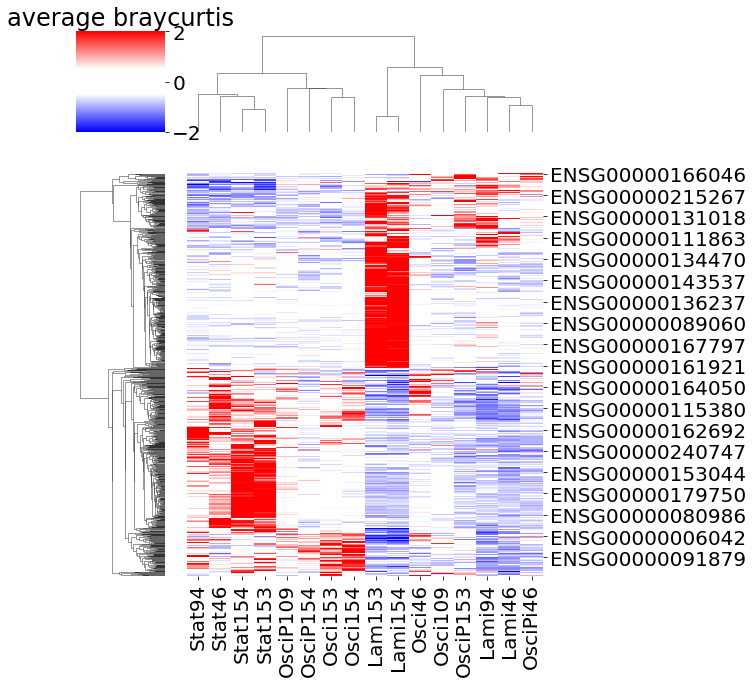

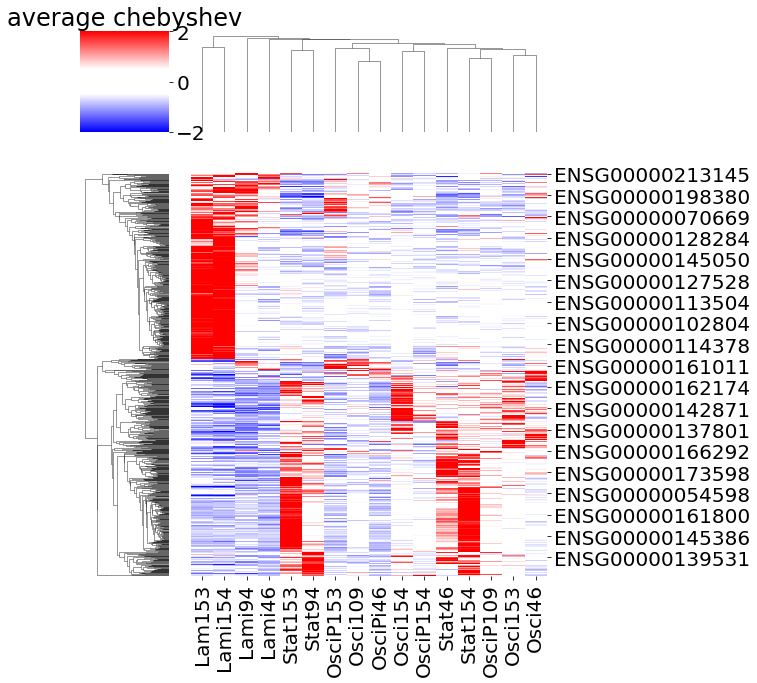

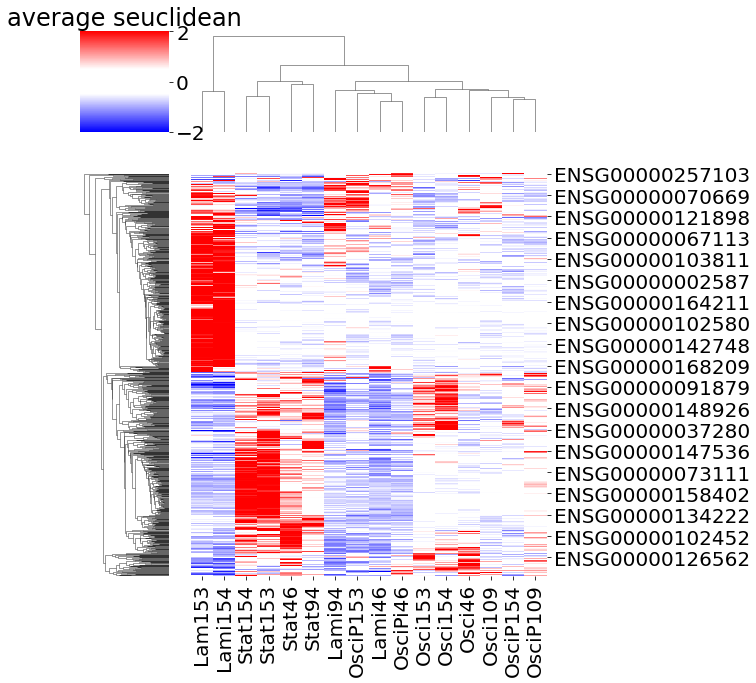

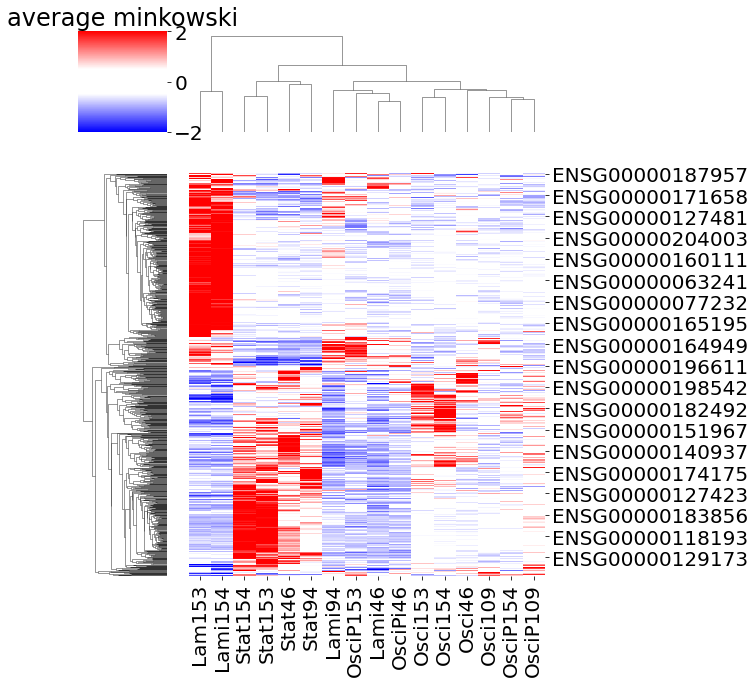

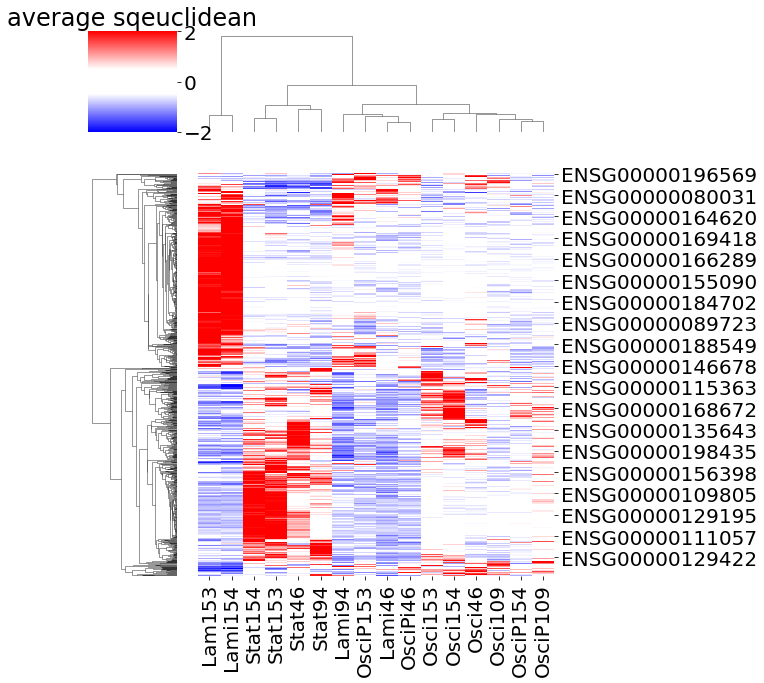

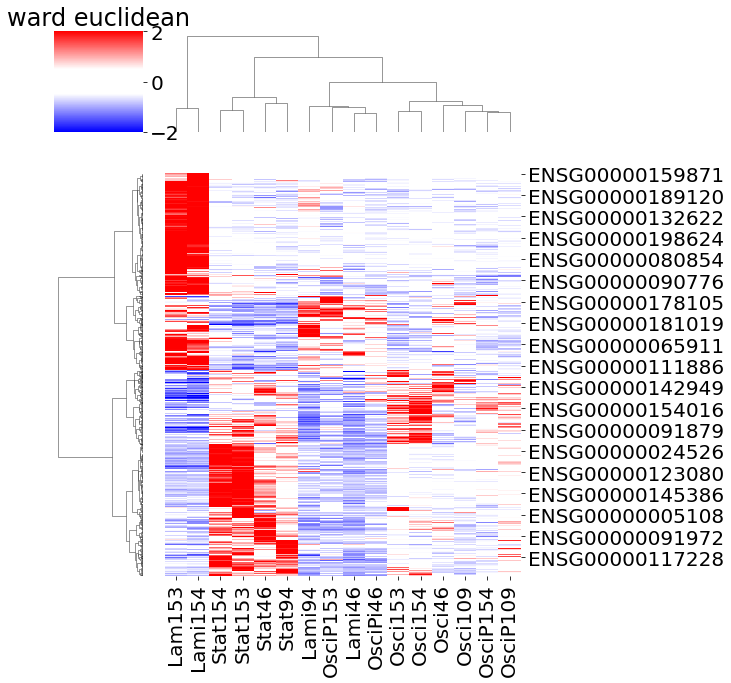

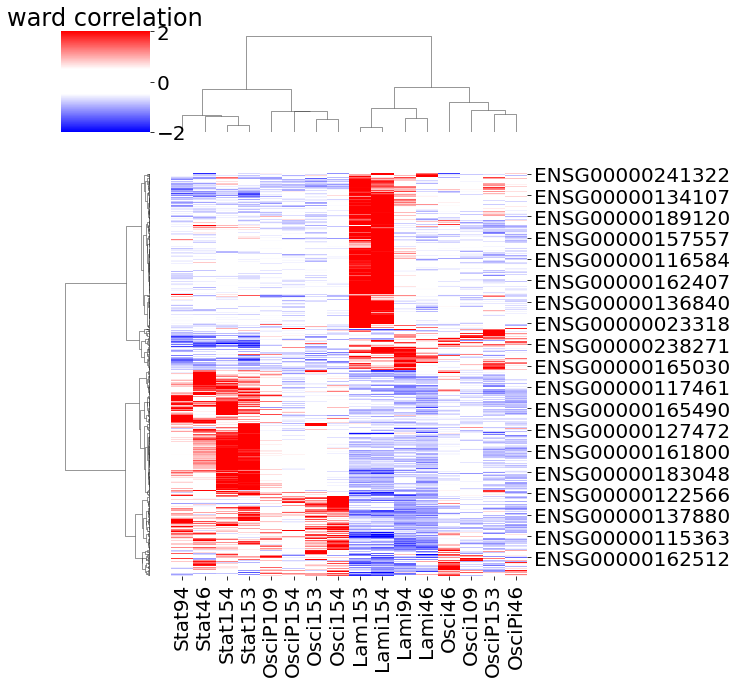

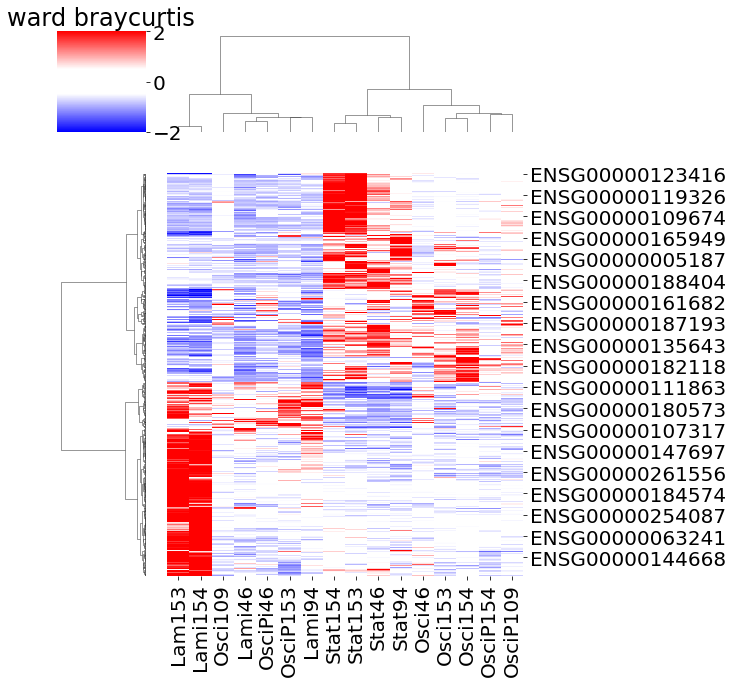

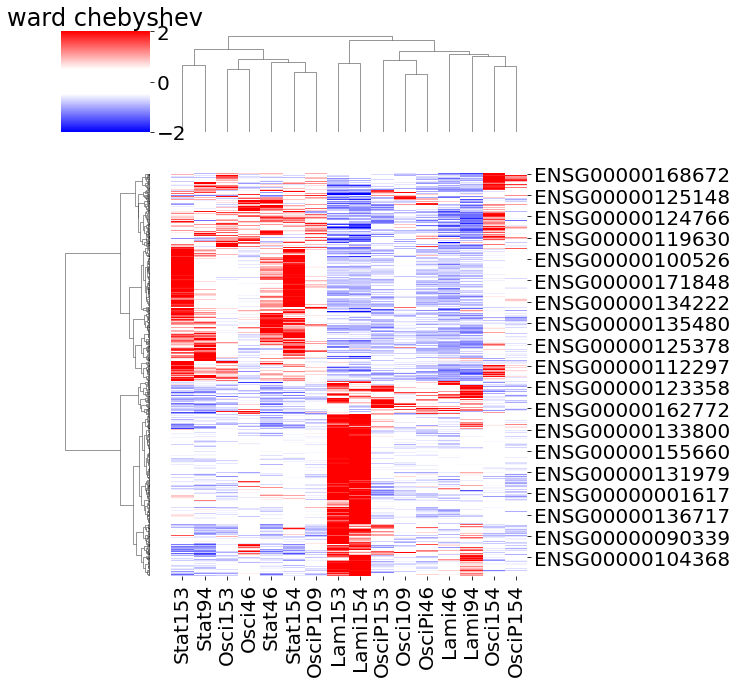

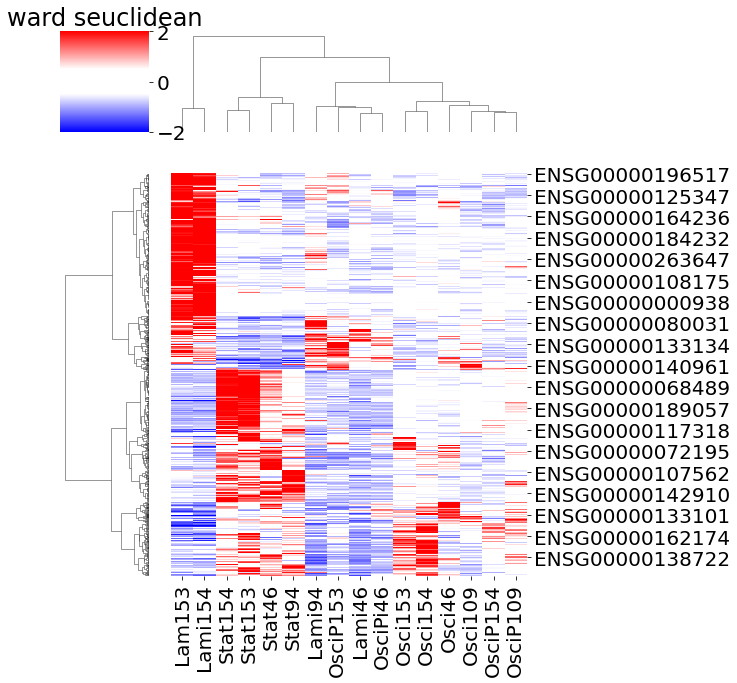

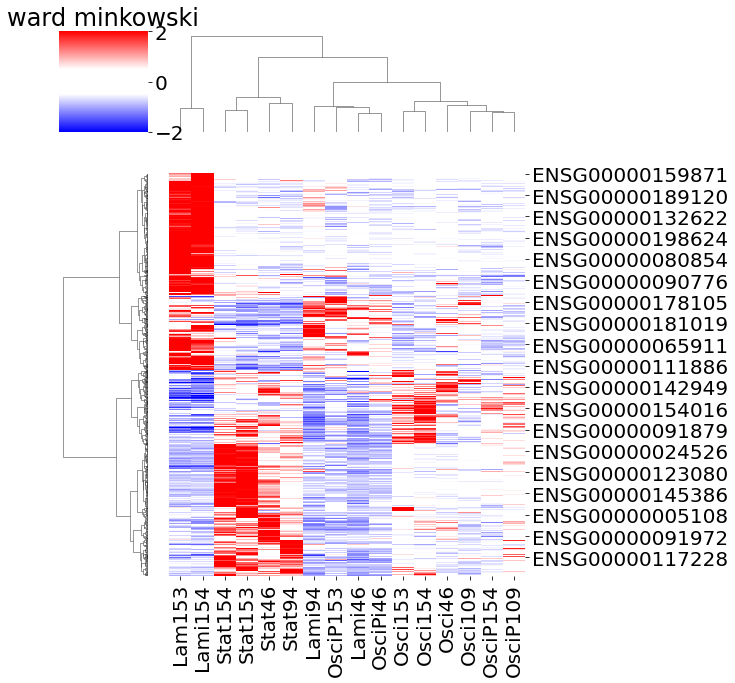

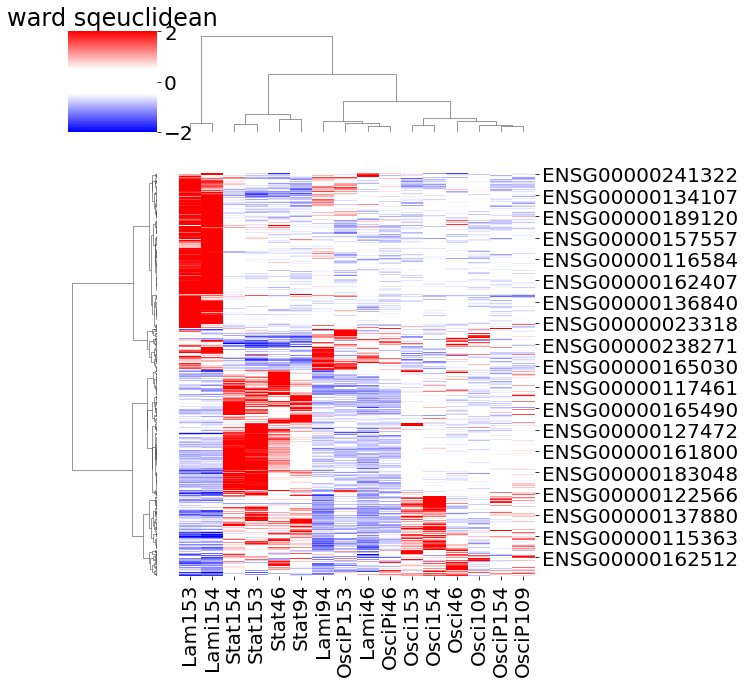

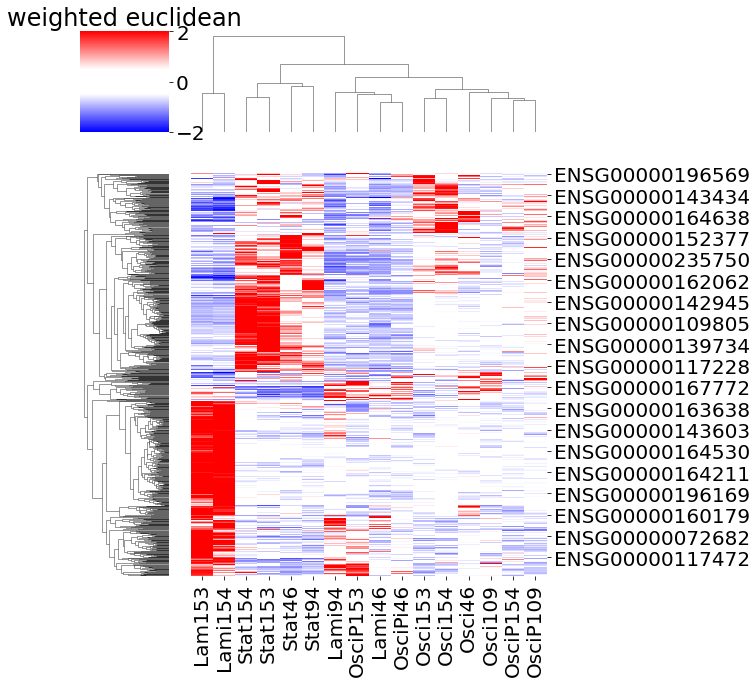

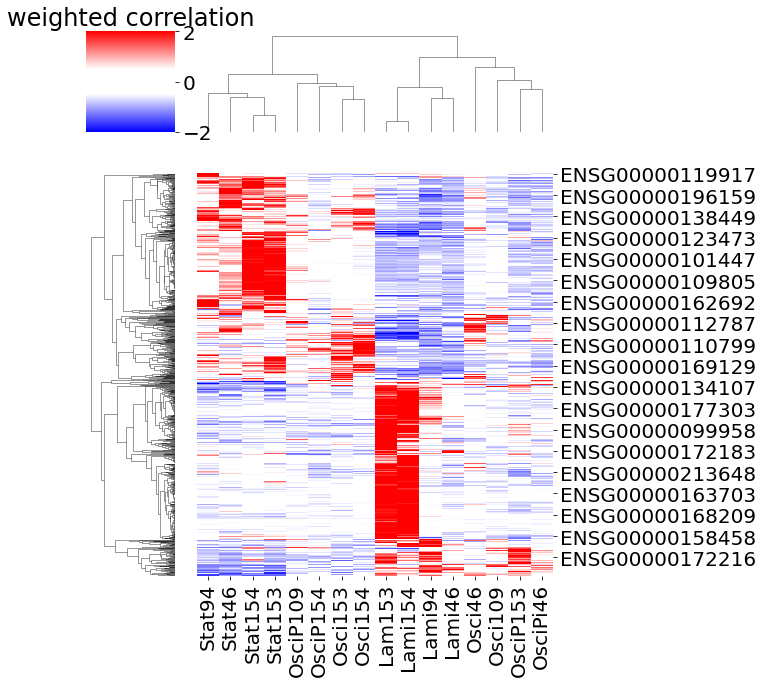

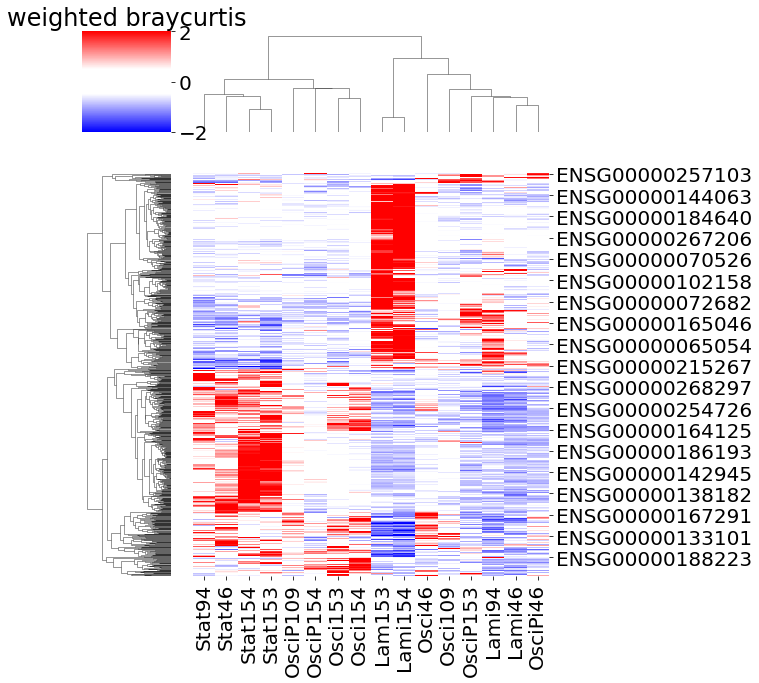

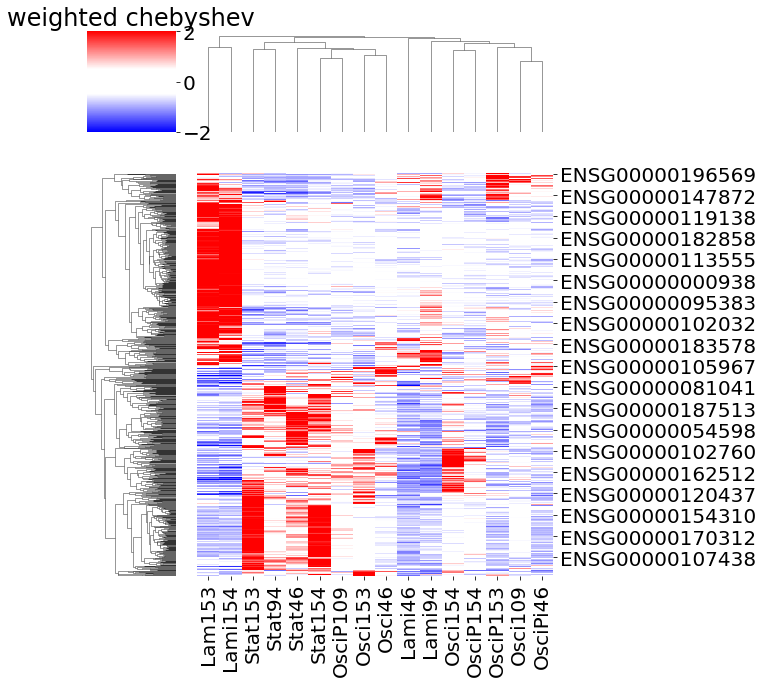

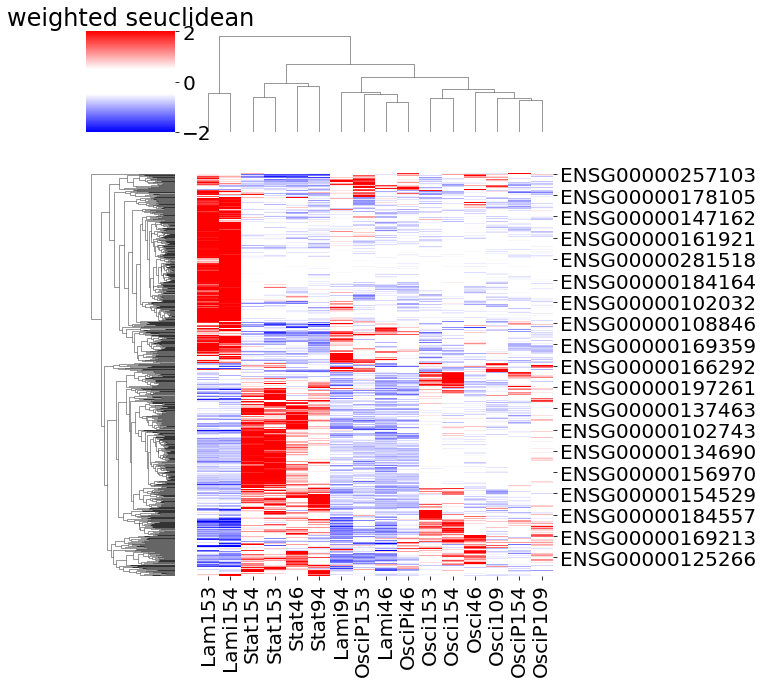

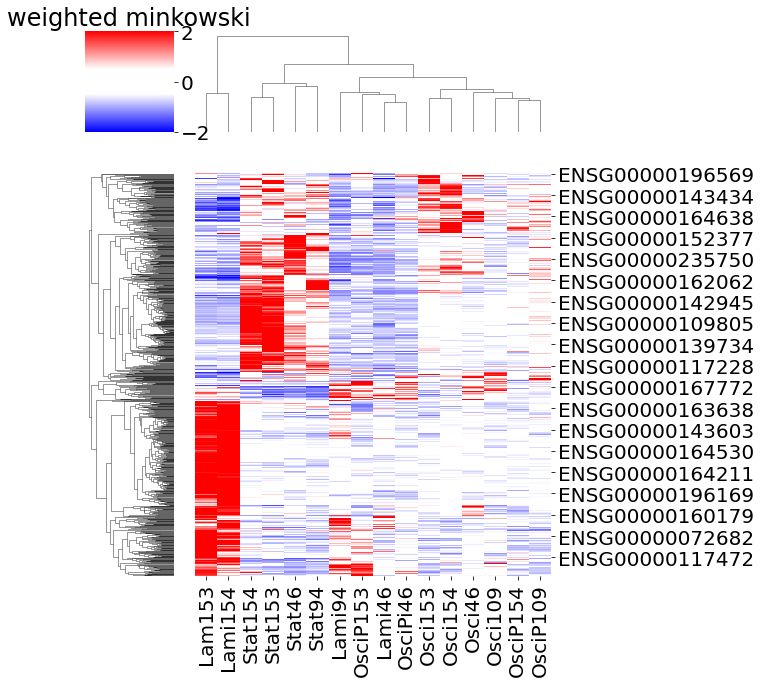

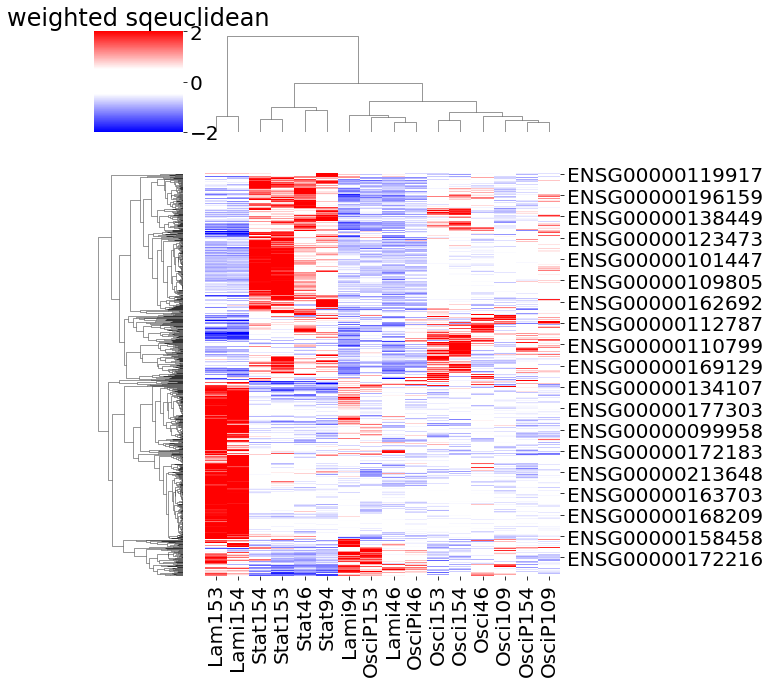

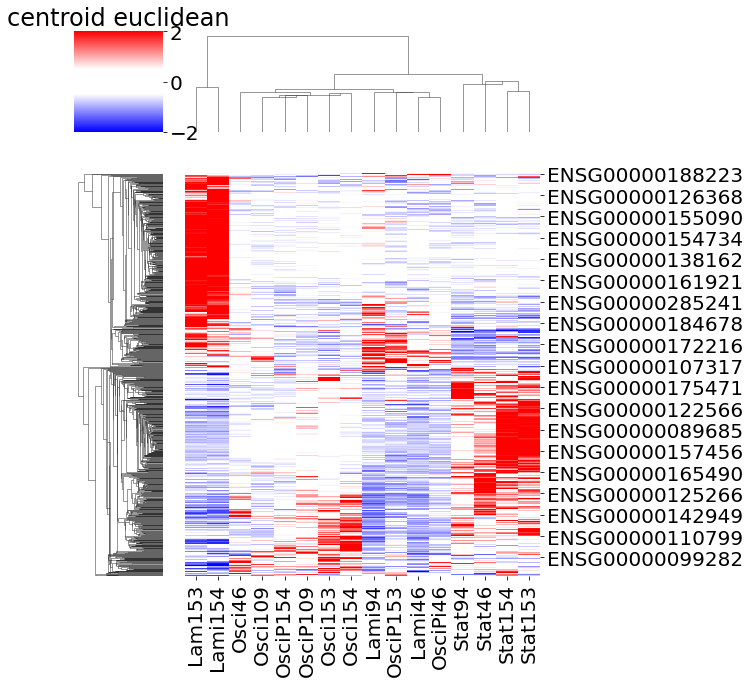

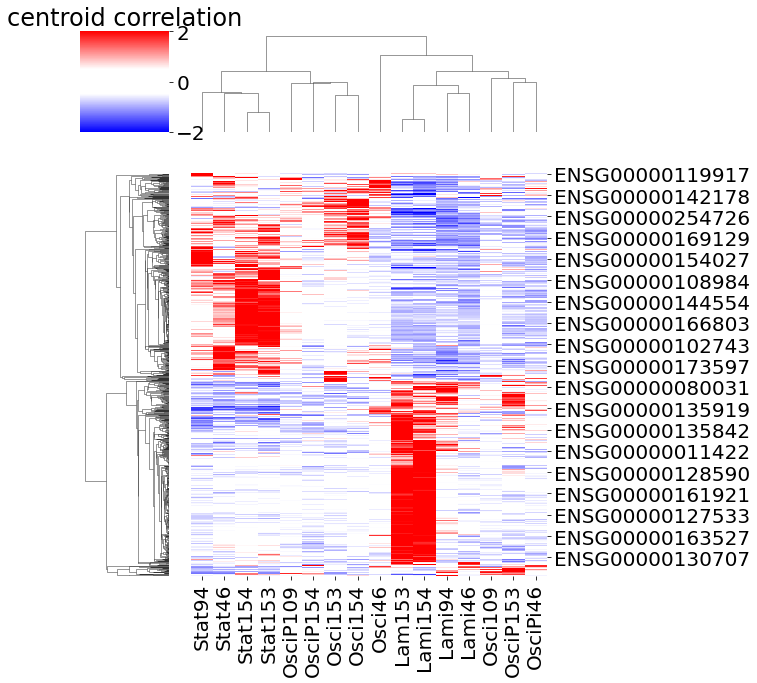

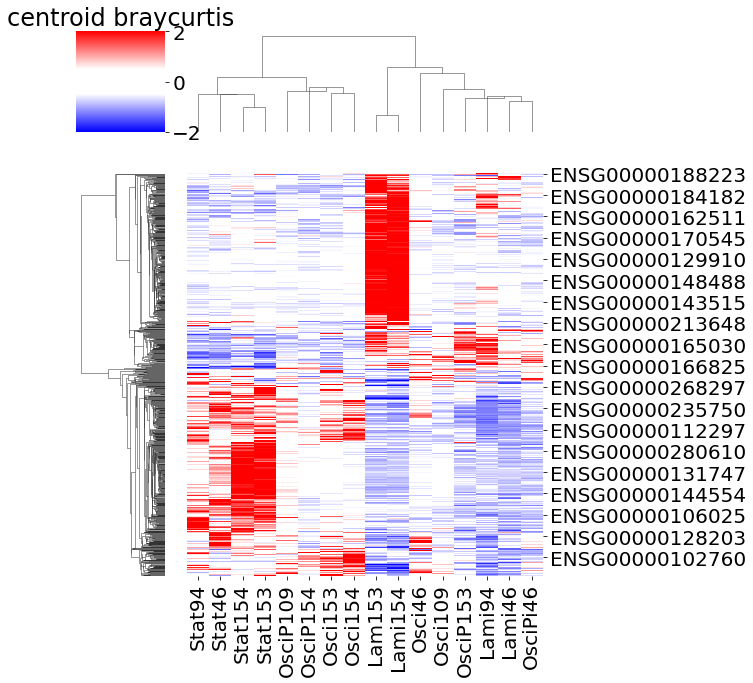

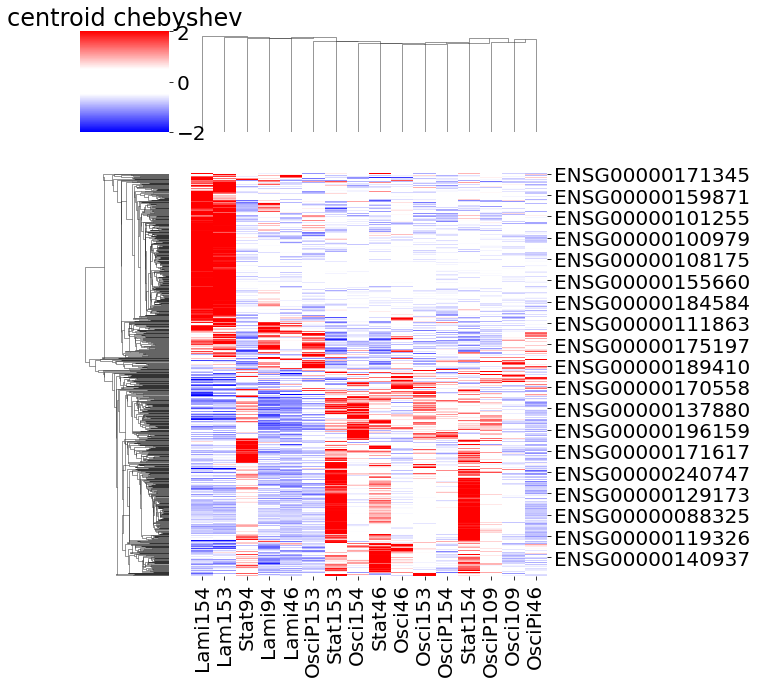

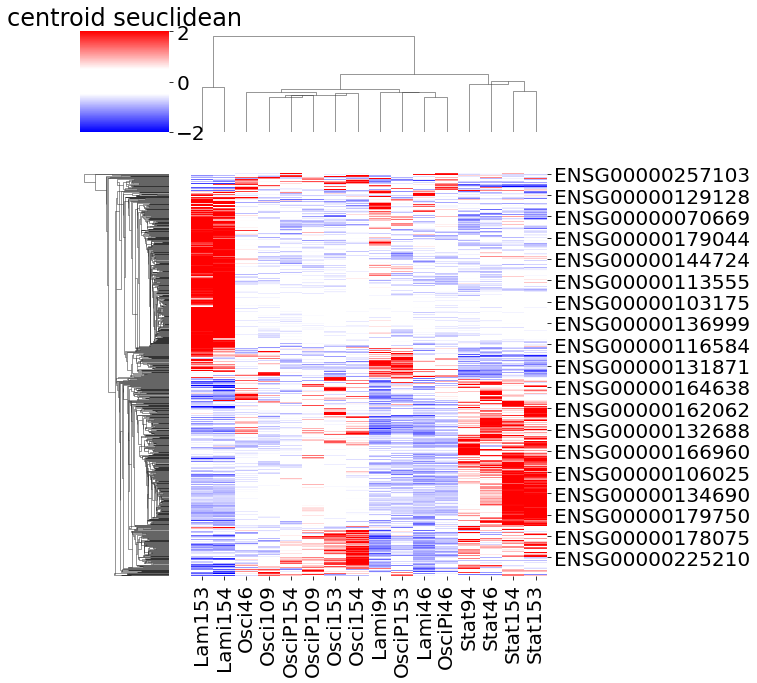

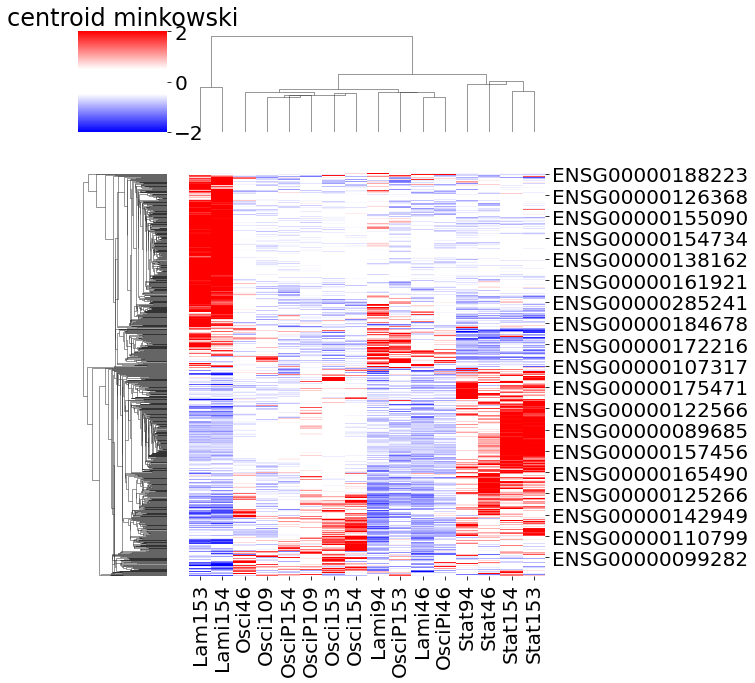

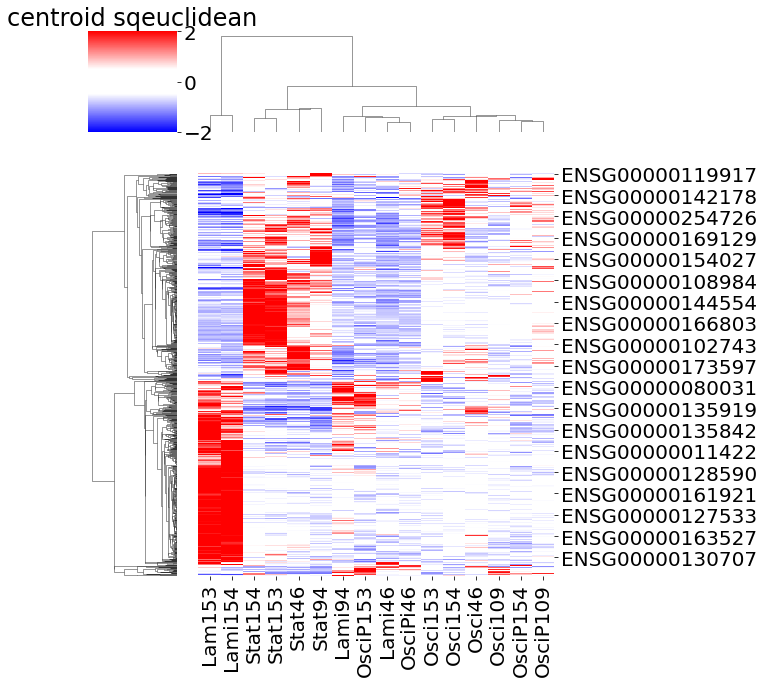

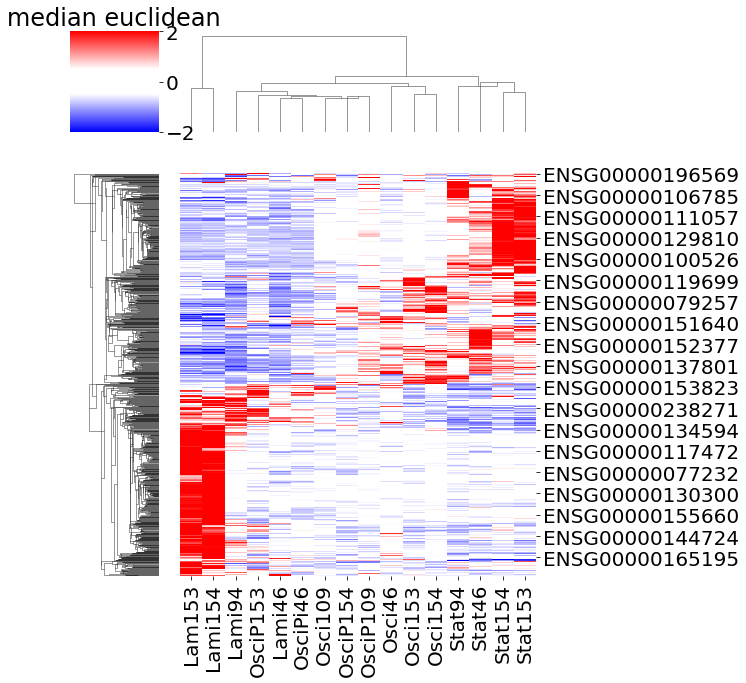

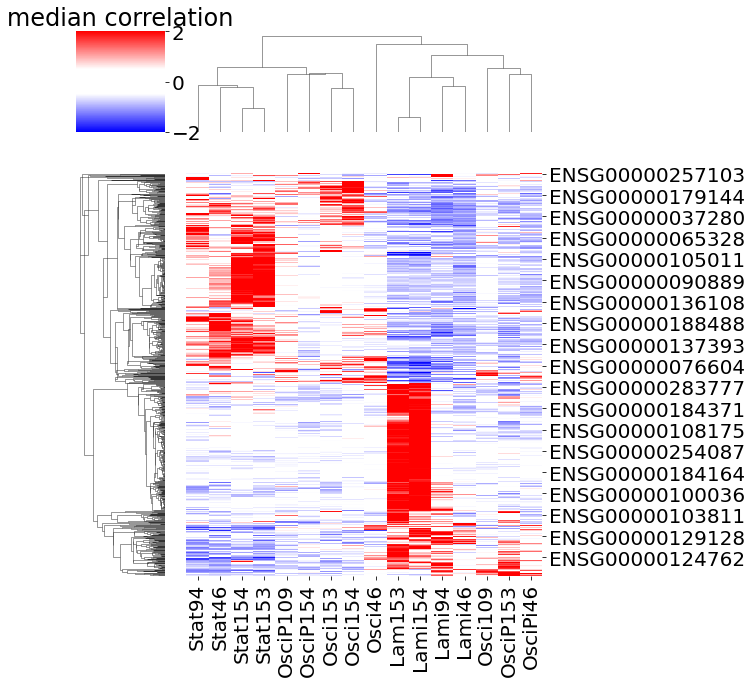

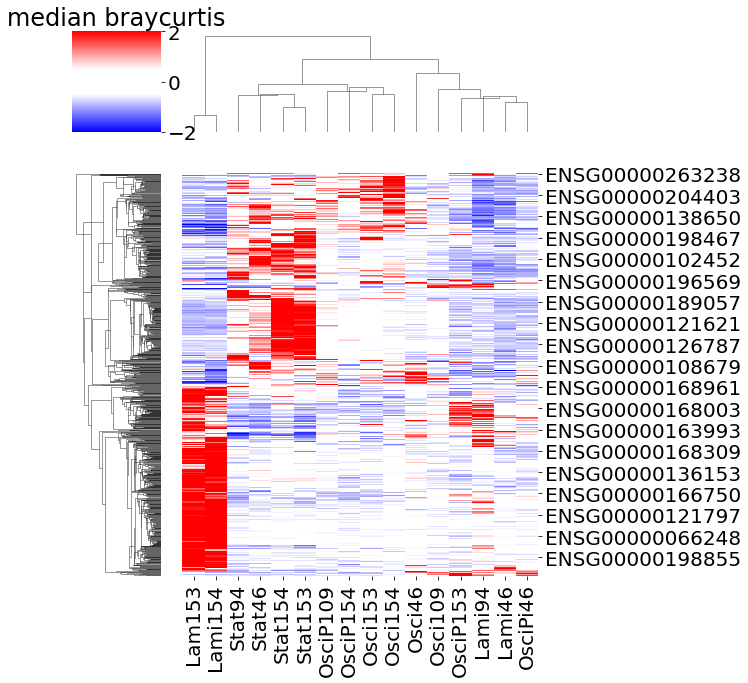

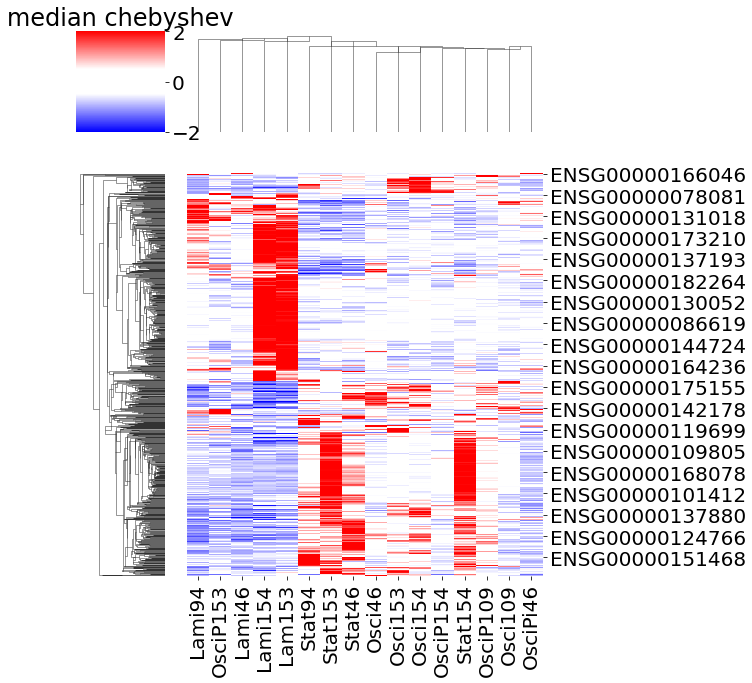

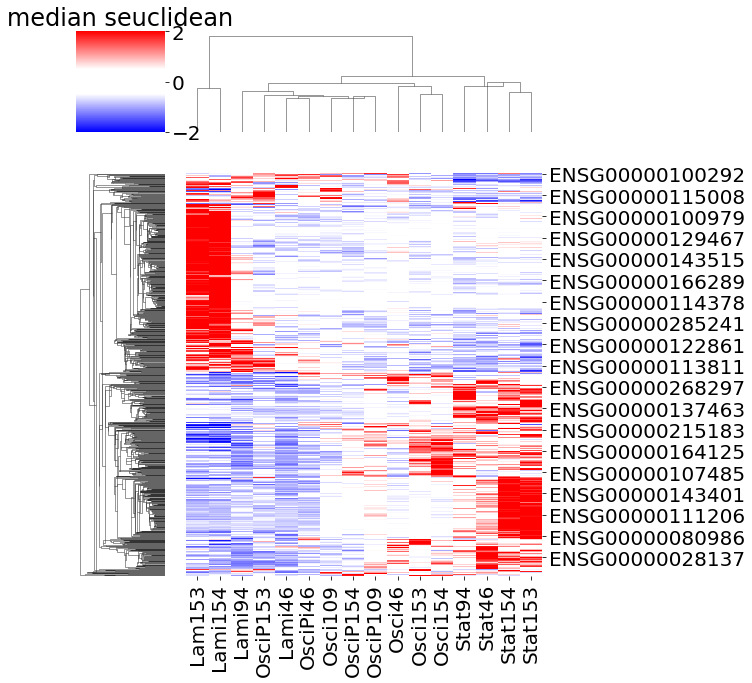

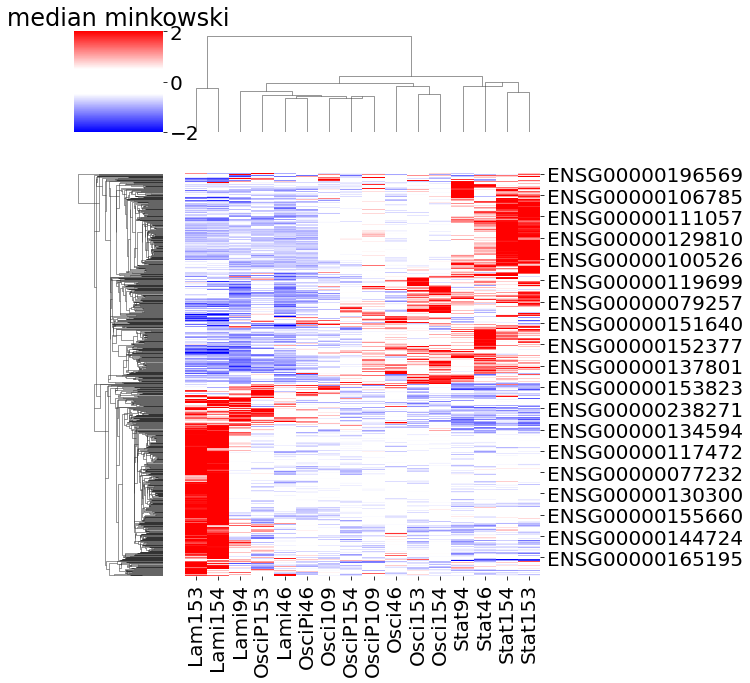

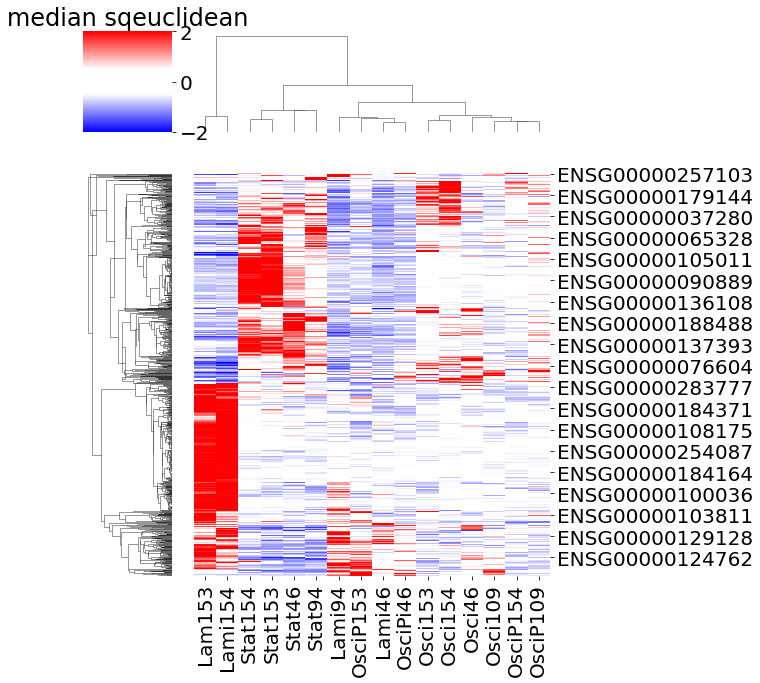

In [15]:
linkage_methods = ['complete', 'single', 'average', 'ward', 'weighted', 'centroid', 'median']
distance_metrics = ['cosine', 'euclidean', 'correlation', 'braycurtis', 'chebyshev', 'seuclidean', 'minkowski', 'sqeuclidean']

for linkage_method in linkage_methods:
    for distance_metric in distance_metrics:
        
        if linkage_method == 'single' and (distance_metric == 'chebyshev' or distance_metric == 'minkowski'):
            pass
        else:
    
            print('working with {} and {}...'.format(linkage_method, distance_metric))

            seaborn.clustermap(zscore_df, cmap=bwwr, method=linkage_method, metric=distance_metric, vmin=-2, vmax=2)

            matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
            matplotlib.pyplot.tight_layout()
            matplotlib.pyplot.savefig('figures/{}.{}.pdf'.format(linkage_method, distance_metric))

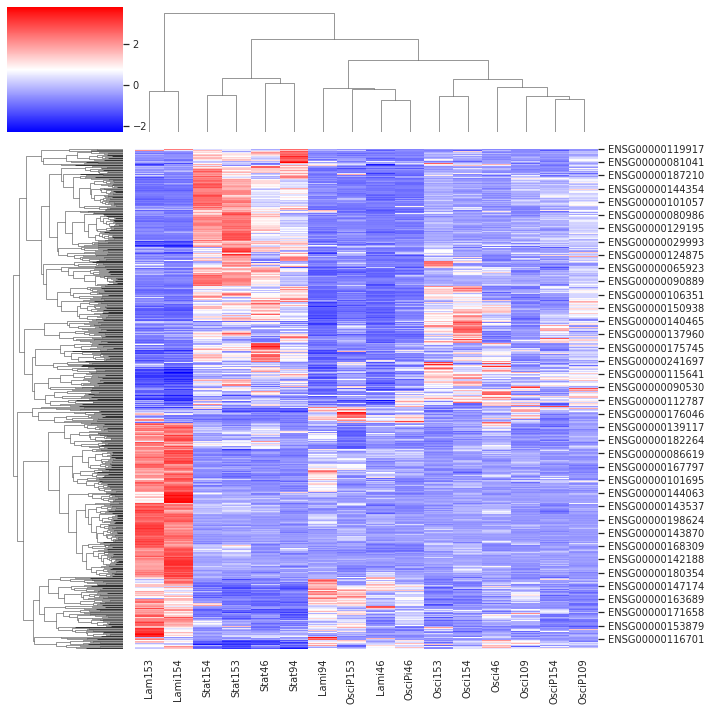

In [16]:
# generate the figure with metabolite names
linkage_method = 'complete'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(zscore_df, cmap='bwr', method=linkage_method, metric=distance_metric)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

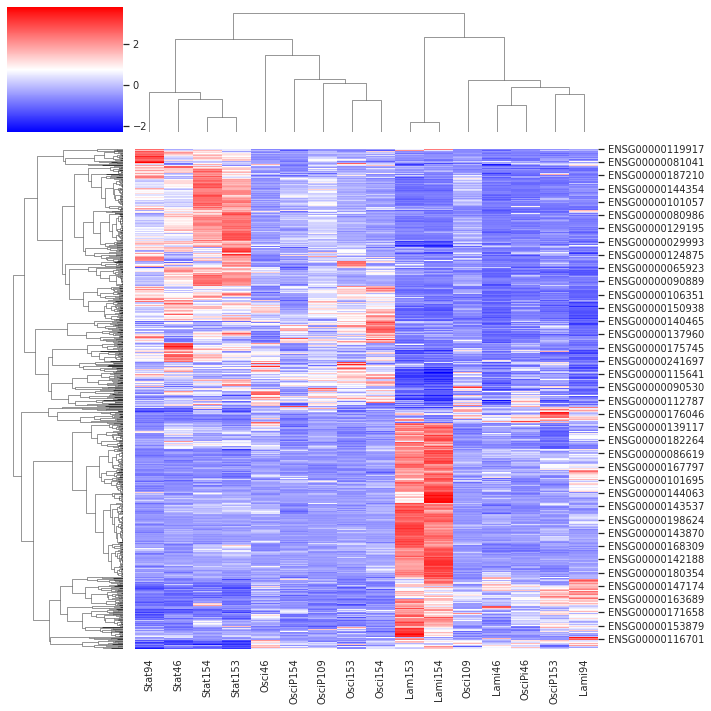

In [17]:
# generate the figure with metabolite names
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.set(font_scale=0.9)
seaborn.clustermap(zscore_df, cmap='bwr', method=linkage_method, metric=distance_metric)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

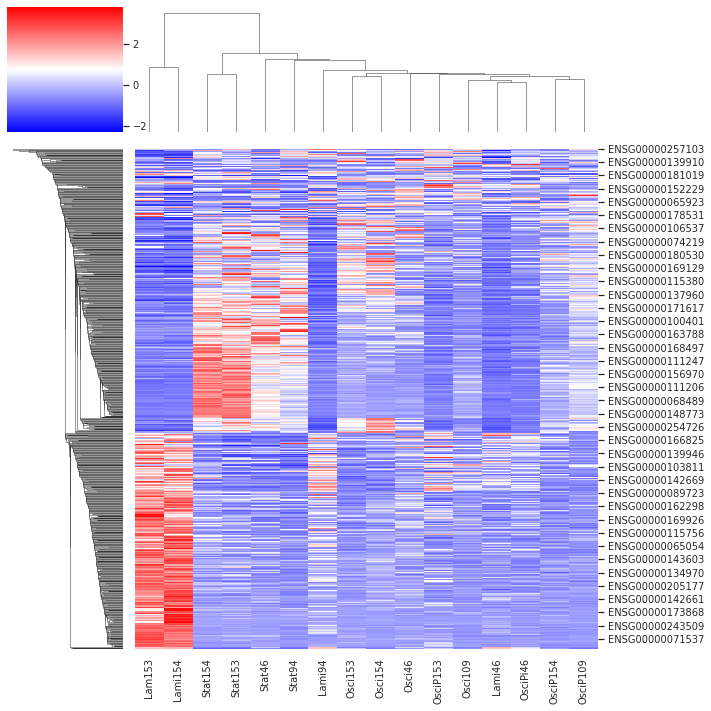

In [18]:
# generate the figure with metabolite names
linkage_method = 'single'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(zscore_df, cmap='bwr', method=linkage_method, metric=distance_metric)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

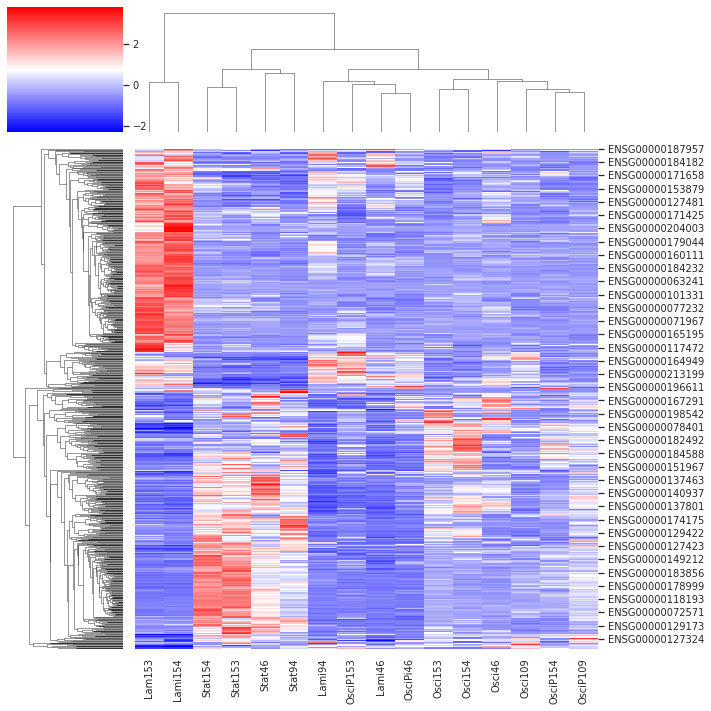

In [19]:
# generate the figure with metabolite names
linkage_method = 'average'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(zscore_df, cmap='bwr', method=linkage_method, metric=distance_metric)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

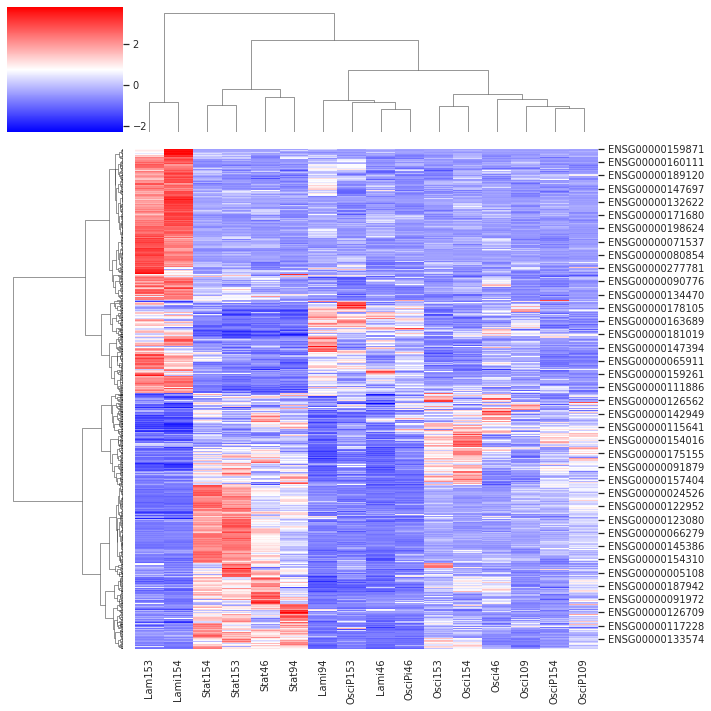

In [20]:
# generate the figure with metabolite names
linkage_method = 'ward'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(zscore_df, cmap='bwr', method=linkage_method, metric=distance_metric)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

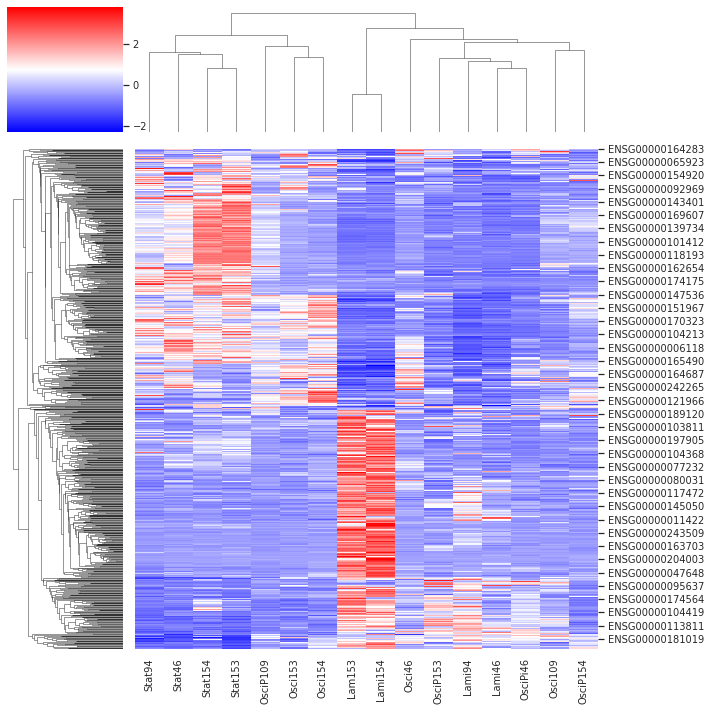

In [21]:
# generate the figure with metabolite names
linkage_method = 'average'
distance_metric = 'canberra'

seaborn.set(font_scale=0.9)
seaborn.clustermap(zscore_df, cmap='bwr', method=linkage_method, metric=distance_metric)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()